# Analisis Exploratorio TP1

In [2]:
import numpy as np 
import pandas as pd
import datetime

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stations = pd.read_csv("Data/station.csv")
stations.head()


,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


La cantidad de estaciones es:

In [4]:
print (str(len(stations.id.unique())))
print (str((stations.city.unique())))

70
['San Jose' 'Redwood City' 'Mountain View' 'Palo Alto' 'San Francisco']


Los nombres de las 70 estaciones son:

In [25]:
print (stations.name.unique()) 
print (stations.id.unique())

['San Jose Diridon Caltrain Station' 'San Jose Civic Center'
 'Santa Clara at Almaden' 'Adobe on Almaden' 'San Pedro Square'
 'Paseo de San Antonio' 'San Salvador at 1st' 'Japantown'
 'San Jose City Hall' 'MLK Library' 'SJSU 4th at San Carlos'
 'St James Park' 'Arena Green / SAP Center' 'SJSU - San Salvador at 9th'
 'Franklin at Maple' 'Redwood City Caltrain Station'
 'San Mateo County Center' 'Redwood City Public Library'
 'Stanford in Redwood City' 'Redwood City Medical Center'
 'Mountain View City Hall' 'Mountain View Caltrain Station'
 'San Antonio Caltrain Station' 'Evelyn Park and Ride'
 'San Antonio Shopping Center' 'Castro Street and El Camino Real'
 'Rengstorff Avenue / California Street' 'Palo Alto Caltrain Station'
 'University and Emerson' 'California Ave Caltrain Station'
 'Cowper at University' 'Park at Olive' 'Clay at Battery'
 'Davis at Jackson' 'Commercial at Montgomery' 'Washington at Kearney'
 'Post at Kearney' 'Embarcadero at Vallejo' 'Spear at Folsom'
 'Harry Bridg

Cantidad de "docks" (espacios para estacionar las bicicletas):

In [6]:
print (str(stations.dock_count.sum()))

1236


In [7]:
#Analizar las instalaciones que no fueron todas en simultaneo...City Hall	27	

In [8]:
df = pd.read_csv("Data/trip.csv")
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M') #Pase a formato datetime las fechas porque es mas comodo
df.end_date = pd.to_datetime(df.end_date, format='%m/%d/%Y %H:%M')
df.head()


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


Analizamos si figuran la misma cantidad de estaciones que en stations.csv

¿Las estaciones que figuran en stations.csv coinciden con las que se registraron en trip.csv? 

In [32]:
print (str(len(df.start_station_id.unique())))
print (str(len(df.end_station_id.unique())))
print (str(len(df.start_station_name.unique())))
print (str(len(df.end_station_name.unique())))

print (str((df.start_station_id.unique())))

70
70
74
74
[76 67 62 39 41 46 10 59 35 68  5 74 71 69 27 73 48 61 75 66 47 70 11 50 58
 77 65 72 60 30 42  6 34 54 57 23 45  8 37 64  4 22 51  3 13 56 55 49 63  2
  7  9 28 36 29 33 14 12 21 26 38 24 16 25 80 32 31 82 83 84]


Vemos que figuran 74 estaciones nombradas diferente pero seguimos contando 70 stations id.
Veamos si los 70 ids de ambos csv coinciden. Lo mismo para los nombres.

In [43]:
# print (str(len(df.start_station_name.unique())))
stations_d = {}
for name in stations.name:
    stations_d[name] = 0;

stations_x = {}
for name in df.start_station_name:
    if name not in stations_d:
        if name in stations_x:
            stations_x [name] += 1
        else:
            stations_x[name] = 0
stations_x = {}
for name in df.end_station_name:
    if name not in stations_d:
        if name in stations_x:
            stations_x [name] += 1
        else:
            stations_x[name] = 0
        
        
print stations_x    

{'Post at Kearny': 6669, 'Broadway at Main': 69, 'San Jose Government Center': 22, 'Washington at Kearny': 5151}


Debemos definir que vamos a hacer con esas 4 estaciones que no figuran en stations.csv

In [10]:
print (str(len(df.zip_code.unique())))

7440


Las duraciones están en segundos, para el análisis conviene pasar a minuto.

In [11]:
df.duration /= 60
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


Verificamos si hay datos nulos:

In [12]:
df.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

Resumen estadístico del dataframe:

In [13]:
df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,669959.000000,669959.000000,669959.000000,669959.000000
mean,460382.009899,18.465831,57.851876,57.837438,427.587620
std,264584.458487,370.923950,17.112474,17.200142,153.450988
min,4069.000000,1.000000,2.000000,2.000000,9.000000
25%,231082.500000,5.733333,50.000000,50.000000,334.000000
50%,459274.000000,8.616667,62.000000,62.000000,440.000000
75%,692601.000000,12.583333,70.000000,70.000000,546.000000
max,913460.000000,287840.000000,84.000000,84.000000,878.000000


Tenemos un mínimo de 1 minuto, lo que no va a ser considerado como viaje.
y un máximo de 287840 lo que corresponde a 199.9 días.

Por lo tanto vamos a graficar las duraciones por viaje para identificar valores outliers y luego recortar esos datos.

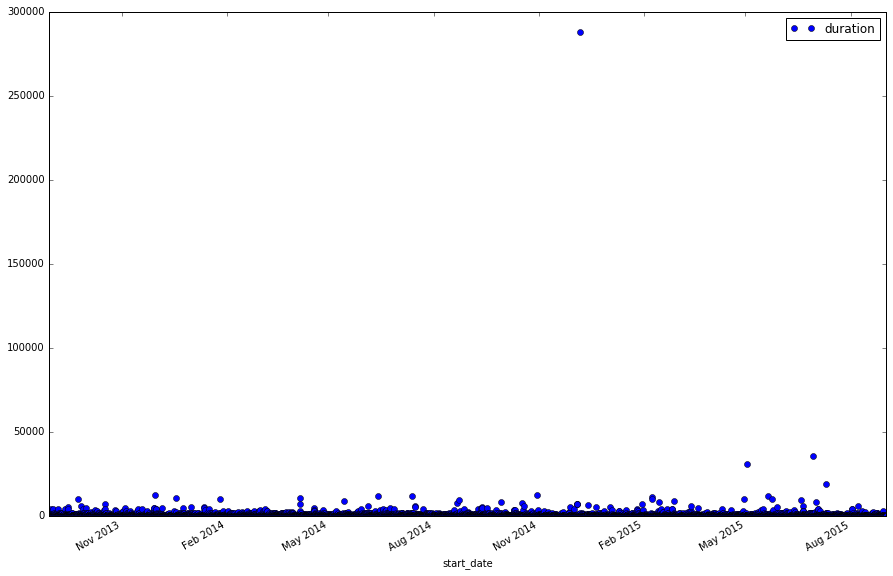

In [14]:
df.plot(x='start_date' , y = 'duration', style='o',figsize=(15,10))

plt.show()

Analizando el gráfico y los valores que se vieron en el resumen estadístico vamos a recortar aquellos viajes cuya duración sea menor a 370 minutos y mayor a 3 minutos.

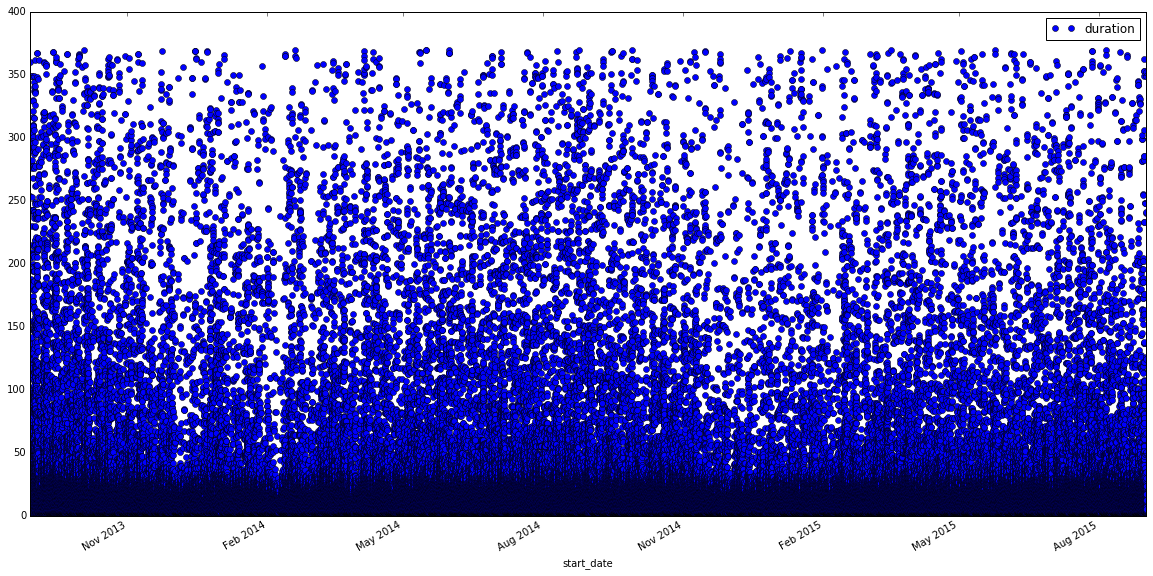

In [15]:
#Voy a crear mi propio data frame de entrenamiento, a medida que voy necesitando datos agrego columnas:
# train =  df[['duration','start_date','start_station_name','start_station_id','end_date','end_station_name','end_station_id','bike_id','subscription_type','zip_code']]
# train = df[['duration','start_date']]
# train = train[train.duration <= 370]
# train = train[train.duration >3]
df = df[df.duration <= 370]
df = df[df.duration >3]

df.plot(x='start_date' , y = 'duration', style='o',figsize=(20,10))

plt.show()

Podemos ver una zona muy oscura entre los viajes de duración entre 3 y 50 minutos.

Ahora vamos a analizar la cantidad de viajes contra los distintos días de la semana.

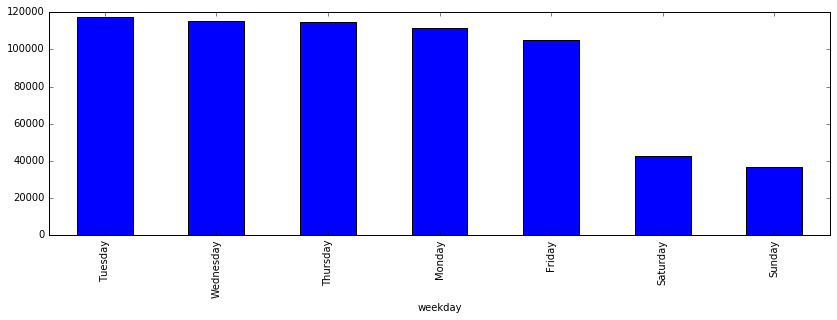

In [16]:
df['weekday'] =  pd.to_datetime(df['start_date']).dt.weekday_name
df.groupby('weekday').count()['start_date'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

Vemos que los fines de semana se realiazaron notablemente menor cantidad de viajes.

Podemos ahora analizar la duración promedio de los viajes para cada dia de semana

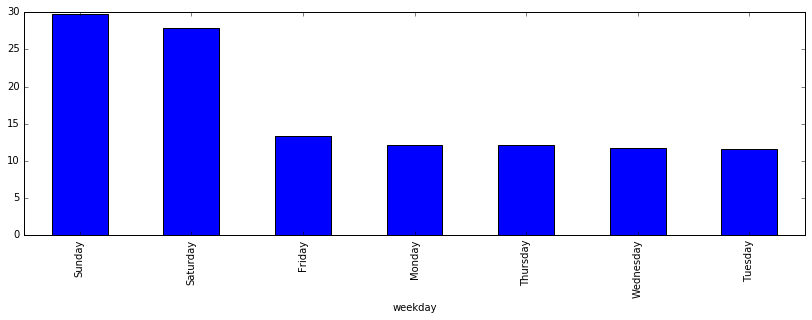

In [17]:
df.groupby('weekday').mean()['duration'].sort_values(ascending=False)[0:7].plot(kind='bar',figsize=(14,4));

El último grafico nos muestra claramente que los fines de semana la duración de los viajes es mucho mayor que la de los días de semana.

Ahora analizemos la cantidad de viajes segun el mes: 

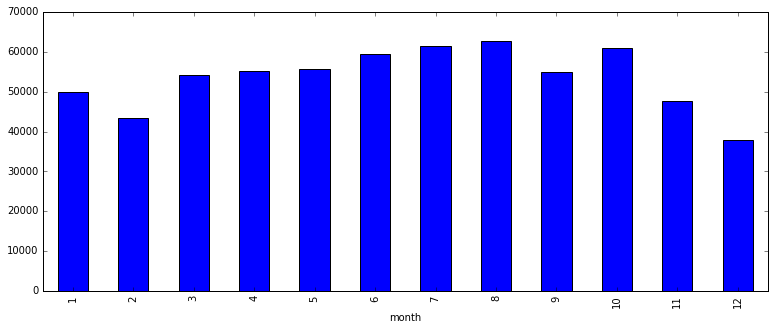

In [18]:
df['month'] =  pd.to_datetime(df['start_date']).dt.month

df.groupby('month').count()['start_date'][0:12].plot(kind='bar',figsize=(13,5));

Ahora podríamos ver el clima según los meses para comprender mejor los resultados del gráfico anterior

In [19]:
weather = pd.read_csv("Data/weather.csv")
weather['month'] =  pd.to_datetime(weather['date']).dt.month
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,month
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,8
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,8
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,8
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107,9
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107,9


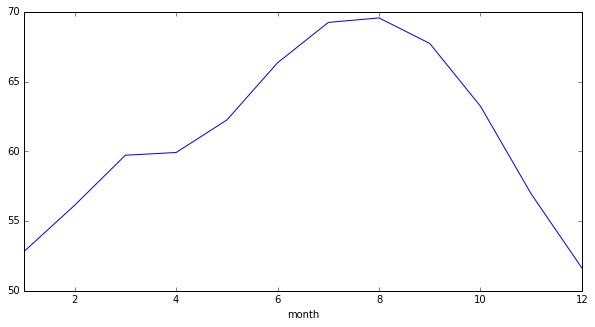

In [20]:
weather.groupby('month').mean()['mean_temperature_f'][0:12].plot(kind='line',figsize=(10,5));

Vemos que el promedio de temperaturas más altas se registra entre los meses de junio y octubre, lo que coincide con el incremento en la cantidad de viajes en esos meses, de todos modos no explicaría el pico de enero. 
Lo que si podria explicarlo son los dias de vacaciones, pasamos a analizar esto último.

In [21]:
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df.start_date.min(), end=df.start_date.max())

# #Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=df.start_date.min(), end=df.start_date.max(), freq=us_bd)

business_days = pd.to_datetime(business_days, format='%Y/%m/%d').date
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date

# #A 'business_day' or 'holiday' is a date within either of the respected lists.
df['business_day'] = df.start_date.isin(business_days)
df['holiday'] = df.start_date.isin(holidays)


# fig, ax = plt.subplots()

# colors = {False:'red', True:'green'}


# fig.set_size_inches(18, 10)
# plt.scatter(df.id, df.duration, c=df.holiday.map(colors))
# plt.show()




In [22]:
print df.subscription_type.unique()

['Subscriber' 'Customer']


Ver la duración de viajes de los Subscribers vs Customer

Ver la frecuecia de viajes a lo largo del dia y dependiendo cual dia de la semana.

- cantidad de viajes workday a lo largo de las 24hs del dia
- cantidad de viajes weekend a lo largo de las 24hs del dia

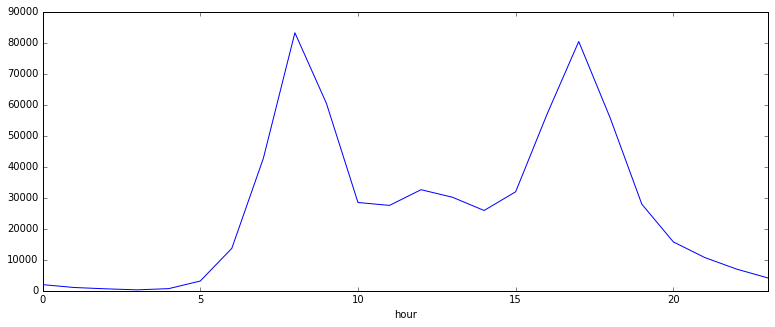

In [23]:
df['hour'] =  pd.to_datetime(df['start_date']).dt.hour
# df.groupby('column').filter(lambda group: group.size > X)

df.groupby('hour').count()['duration'][0:24].plot(kind='line',figsize=(13,5))